## IMPORTO LAS LIBRERIAS NECESARIAS

In [1]:
# Librerias de manejo de datos 
import pandas as pd
# from pandasgui import show
from scipy import stats
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


## OBJETIVO:
  - Extraer todos los datos interesantes, para las inmovilarias vacacionales de la ciudad de NY, a petición del cliente

### Cargar datos y mostrarlos

In [2]:
# cargo los datos
city = pd.read_csv("NY_airbnb.csv")
# muestro los datos del csv de las 5 primeras filas
city.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Nos enseña que los valores faltantes se representan con un NaN.

### Exploración Basica

In [3]:
# Muestro los nombres de las columnas
city.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# Descripción estadistica 
city.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Información basica del DataFrame (tipo de datos, valores null, uso de memoria)
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Podemos observar que nos dice de que tipo son si son int=enteros, float=numeros decimal y object=texto.

In [6]:
city.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Reprse paralizo todoesenta los valores perdidos de cada columna.
- Podemos ver que faltan valores en name y host_name.
- Y tambien en last_review y review_per_month(ultima_revisión, revisión por meses) creo a que se debe que hay temporadas bajas y altas, tambien hubo una temporada en la que se paralizo todo 

In [7]:
# Información basica de Data set
def summary(city):
    total_values = city.shape[0]
    missing_data = city.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    print(f"Dataset has {city.shape[1]} features and {city.shape[0]} rows.")
    summary = pd.DataFrame(index=city.columns)
    summary["Unique"] = city.nunique().values
    summary["Missing"] = city.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)
    summary["duplicates_count"] = city.apply(lambda x: x.duplicated().sum())
    summary["Types"] = city.dtypes
    
    return summary

# Le asigno una variable a summary para facilitar su manejo
data_basic= summary(city)

# Nombro a la variable para que me la muestre
print(data_basic)

Dataset has 16 features and 48895 rows.
                                Unique  Missing  Missing %  duplicates_count  \
id                               48895        0       0.00                 0   
name                             47905       16       0.03               989   
host_id                          37457        0       0.00             11438   
host_name                        11452       21       0.04             37442   
neighbourhood_group                  5        0       0.00             48890   
neighbourhood                      221        0       0.00             48674   
latitude                         19048        0       0.00             29847   
longitude                        14718        0       0.00             34177   
room_type                            3        0       0.00             48892   
price                              674        0       0.00             48221   
minimum_nights                     109        0       0.00             48786   


### Analisis Univariante "price"

In [8]:
# Estadística descriptiva de price
city["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\Carol\AppData\Local\Temp\ipykernel_10564\4165396062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(city["price"]);


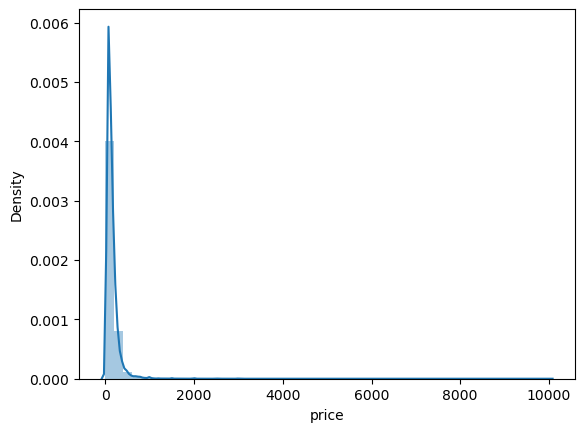

In [9]:
# Grafica de linea
sns.distplot(city["price"]);

Aqui podemos comprobar, que por una parte tenemos la cantidad de propiedadees inmobilarias por unidad de áerea y por otro lugar el precio de las viviendas por área.
- Nos dice que en una área, las casas de la inmobilaria cuestan más que en otras áreas.
- Podemos ver que hay 3 picos altos que son las temporalas mas altas y luego una linea se aplana que son las temporales bajas.
- Tambien que alcanza su punto maximo alrededor de 2.000 de eje X y el 0.006 del eje Y


In [10]:
# Dos medidas estadisticas para la distribucción de los datos.
print("Skewness: %f" % city["price"].skew())
print("Kurtosis: %f" % city["price"].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


Skewness, es una medida que describe la forma de la distribución de una variable aleatoria. Específicamente, indica la dirección y grado y Kurtosis, describe la forma de las colas de una distribución en relación con su parte central. Indica el grado de agudeza o achatamiento de la distribución.
- Skewness, dice que hay asimetría positiva muy pronunciada 
- Kurtosis veo que hay una mayor conceentración de valores, esto indica que tiene que haber valores extremos o inusuales en los datos.

# HIPOTESIS

1. La Ubicación y Precio.
 - Manhattan podrían tener un precio promedio más alto que los listados en otros barrios de Nueva York.

Realizare una grafica de barras, en la que calculare el precio por cada grupo de vencidarios y proyectare los datos, eso me enseñara si las hipotesis realizadas tienen razón o no.

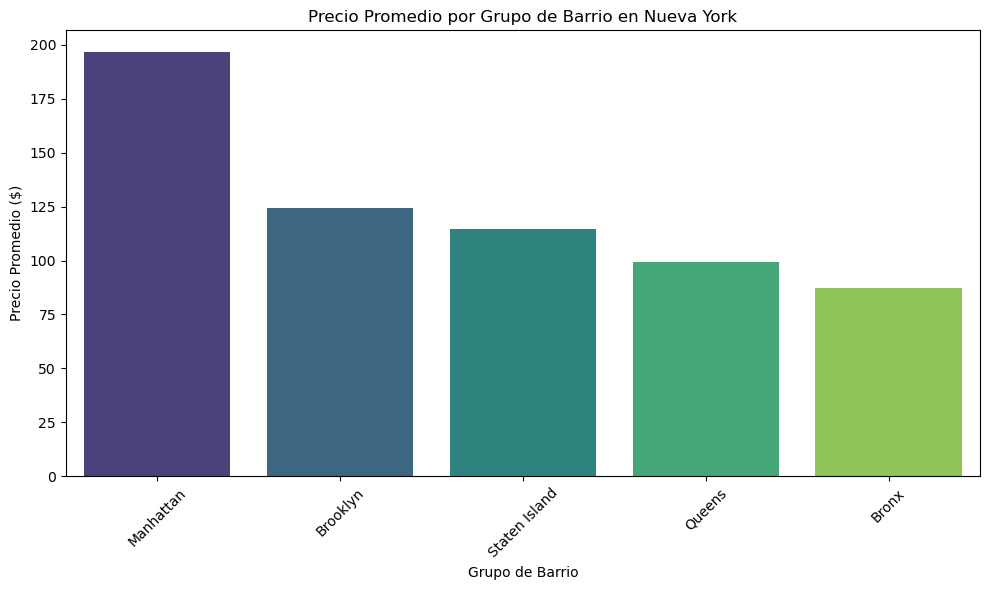

In [11]:
# Grafica de barras de price/neifhbourhood_group
# Calcular el precio por cada grupo de vecindario.
avg_prices = city.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Proyecto los datos.
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")
plt.title('Precio Promedio por Grupo de Barrio en Nueva York')
plt.xlabel('Grupo de Barrio')
plt.ylabel('Precio Promedio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver el la grafica:
  - Que Manhattan es el mas popular puesto que es donde estan todos los museos importantes.
  - El siguiente mas popular es Brooklyn ya que contiene el puente de Brooklyn.
  - Luego iria Staten Island ya que contiene la estatua de la libertad.
  - Queens cuenta con que cada barrio es de una cultura distinta por eso es unos de los que menos se visitan 
  - Por ultimo Bronx que es donde esta ls cuna de la salsa, el hip hop y los famosos grafittis.

Airbnb en Nueva York, es de esperar que Manhattan tenga precios más altos en comparación con la mayoría de los otros barrios, dada su popularidad y demanda entre los turistas.

2. Tipo de Habitación y Precio
 -  Los listados de "Entire home/apt" podrían tener un precio promedio más alto que los de "Private room" o "Shared room".

Realizare unas graficas de cajas donde pueda visualizar que tipo de habitación es la más solicitada por los turistas 

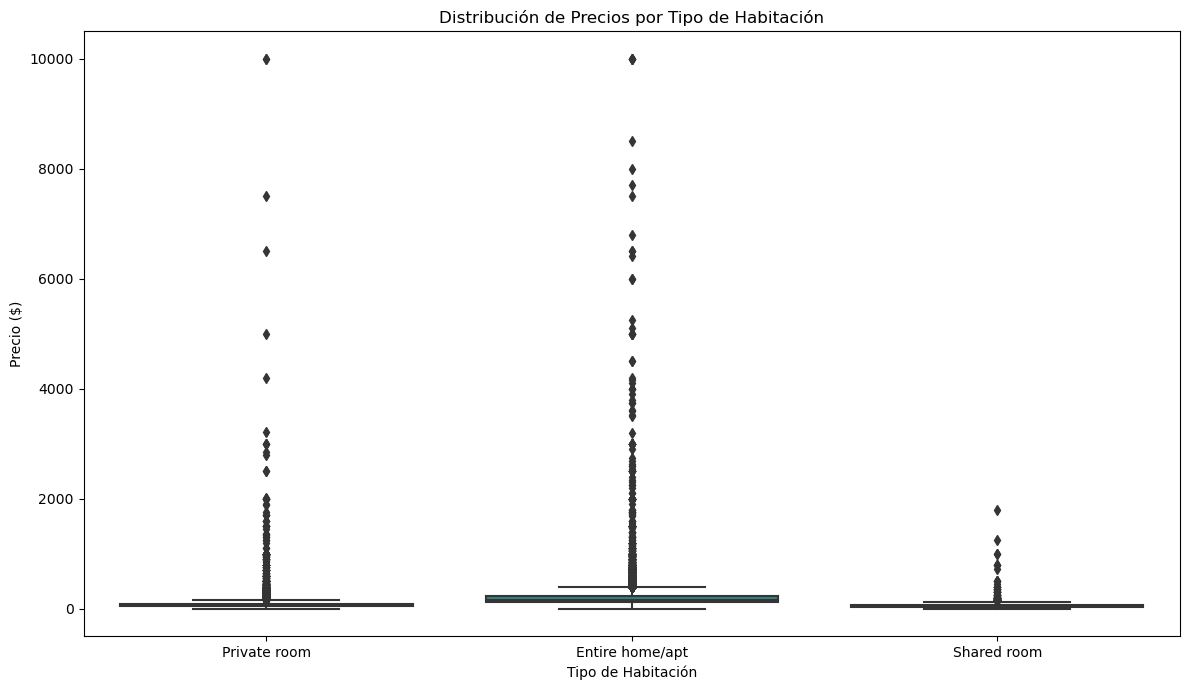

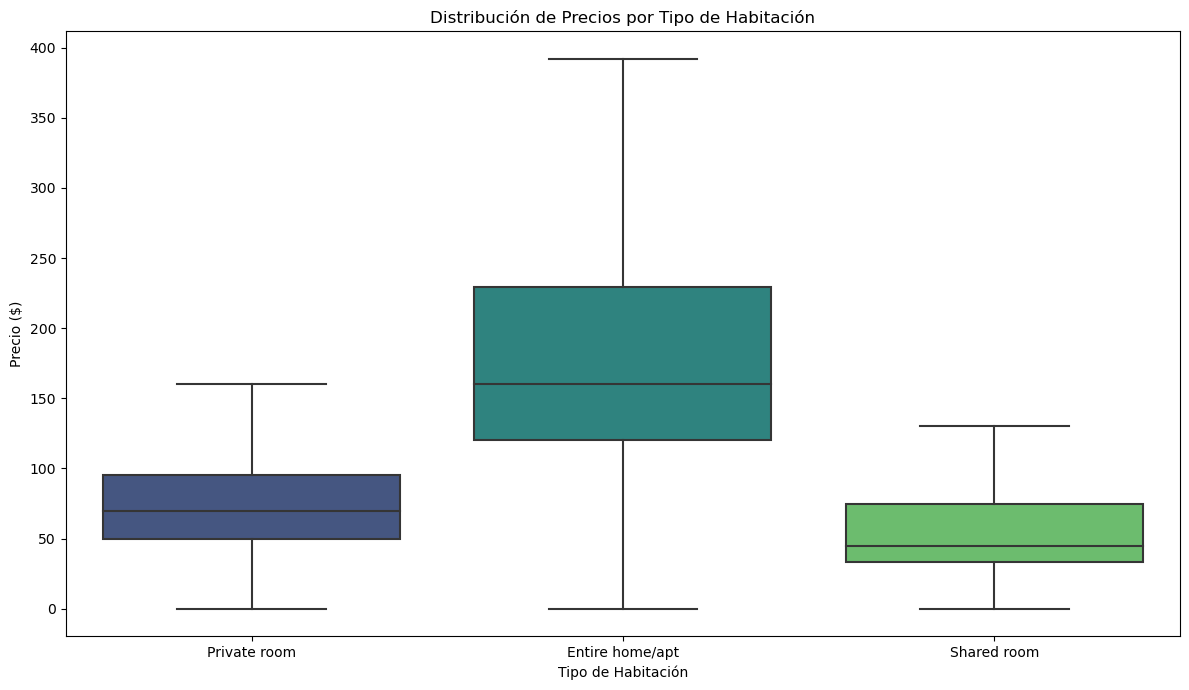

In [12]:
# Diagrama de cajas room_type/price con outliers
plt.figure(figsize=(12, 7))
sns.boxplot(x="room_type", y="price", data=city, palette="viridis")
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

# Diagra de cajas room_type/price sin outliers
plt.figure(figsize=(12, 7))
sns.boxplot(x="room_type", y="price", data=city, palette="viridis", showfliers=False)  # showfliers=False excluye los outliers
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()



Realicé dos tipos de graficas de cajas una de ellas donde podemos observar los outliers y en la otra sin ellos.
 - En la primera grafica en Entire home/apt es donde más outliers tiene siguiendo del private room y donde menos vemos es en Shared room
 - En la segunda grafica pudemos observar, el precio para Entire home/apt es más alto que la de Private room y Shared room.
 - Los listados de "Entire home/apt" también muestran una mayor variación en los precios, como lo indica la altura de su caja, en comparación con las demás.
 - Shared room tiene la mediana más baja y la menor variación en los precios, lo que indica que son generalmente más asequibles y tienen un rango de precios más consistente.


En resumen, los listados de Entire home/apt tienden a ser más caros en promedio en comparación con Private room y Shared room en este conjunto de datos de Airbnb en Nueva York.

3. Disponibilidad y Precio
 - Con mayor disponibilidad durante el año podrían tener un precio más bajo debido a la menor demanda.

Hago una Grafica de dispersión para comprobar si la hipotesis realizada anteriormente

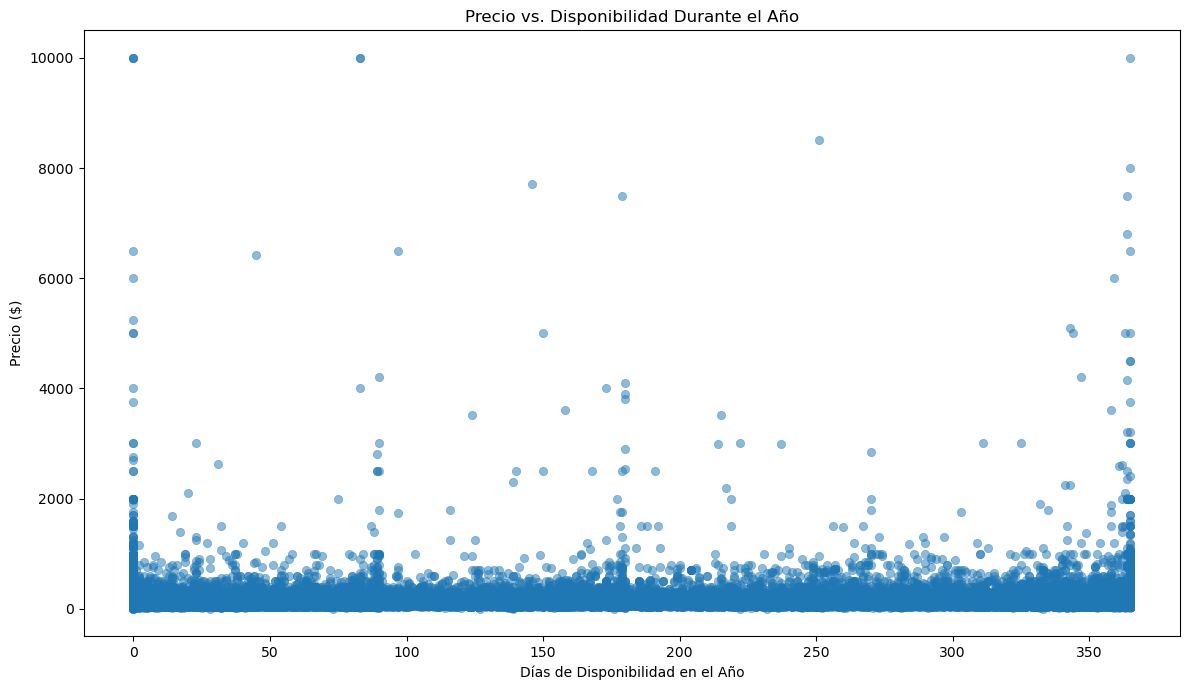

In [13]:
# Diagrama de dispersión de availability_365/price
plt.figure(figsize=(12, 7))
sns.scatterplot(x="availability_365", y="price", data=city, alpha=0.5, edgecolor=None)
plt.title('Precio vs. Disponibilidad Durante el Año')
plt.xlabel('Días de Disponibilidad en el Año')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

Realicé una grafica de dispersión donde puedo ver 
 - Que en los alojamientes con disponibilidad de 365 dias varian el precio, desde la más barata a la más cara.()
 - Podemos observar que hay algunas que no tienen disponibilidad eso querra decir que estan fuera de servio.()
 - Tambien podemos ver que no parece haber ningun padrón claro que diga que las propiedades con más disponibilidad contengan los precios más bajos, es más veo que hay alojamientos con alta disponibilidad en vasi todos los rangos de precios.

Viendo la grafica veo que no hay pruebas claras que muestren que las casas disponibles más días al año sean más baratas.

4. Número de Reviews y Precio
 - Los listados con más reviews podrían tener un precio más bajo, sugiriendo que son más populares y posiblemente más asequibles.

Realizo una grafica de dispersión, para ver la reloción entre el numero de reservas con el pecio.

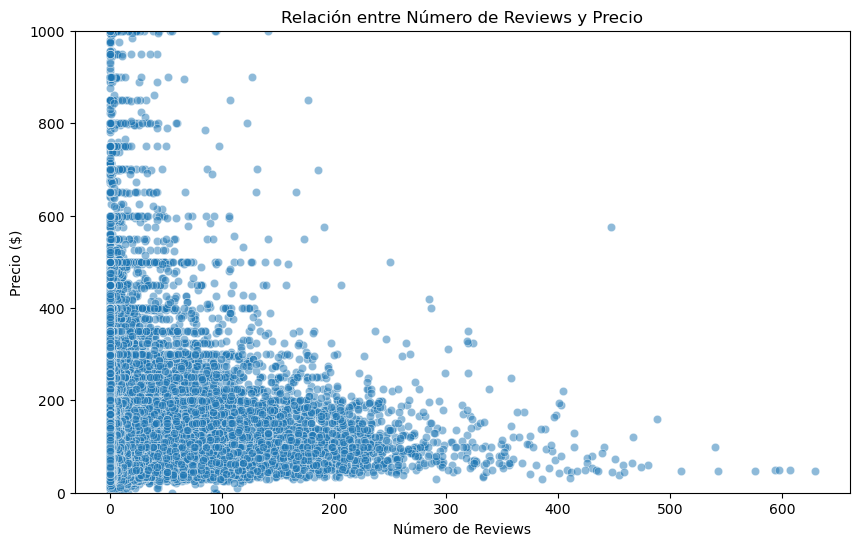

In [14]:
# Diagrama de dispersión number_of_review/price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=city['number_of_reviews'], y=city['price'], alpha=0.5)
plt.title("Relación entre Número de Reviews y Precio")
plt.xlabel("Número de Reviews")
plt.ylabel("Precio ($)")
plt.ylim(0, 1000)  # Limitamos el eje y para una mejor visualización, ya que podrían haber outliers con precios muy altos

plt.show()

En la grafica de dispersión se puede observar
 - Hay una concentración de puntos en la parte de abajo de los numeros de reviews y con precios bajos. 
 - A medida que el número de reviews sube, hay menos personas que reservan con precios muy altos.

La hipótesis realiada anteriorme parece que tiene razón, ya que los listados con un mayor número de reviews tienden a tener precios más bajos. 
Esto podría decir que los alojamientos más baratos suelen ser más populares y, por lo tanto, atraen más reviews.

In [15]:
# Puntuación Z
z = np.abs(stats.zscore(city['price']))
print(z)

0        0.015493
1        0.300974
2        0.011329
3        0.265335
4        0.302811
           ...   
48890    0.344452
48891    0.469373
48892    0.157070
48893    0.406912
48894    0.261171
Name: price, Length: 48895, dtype: float64


### TRATAMIENTO DE OUTLIER

In [16]:
# Veo en que posición estan los Outlier/ de dispresión
print(np.where((city['number_of_reviews']>20) & (city['price']>600)))

print(np.where((city['neighbourhood']=="Manhattan") & (city['price']>600)))


(array([   85,   496,   653,   662,   762,   780,  1201,  1414,  1480,
        1899,  1910,  2040,  2155,  2215,  2236,  2296,  2355,  3055,
        3233,  3240,  3825,  4127,  4292,  4482,  4719,  5351,  5499,
        5801,  5861,  6107,  6277,  6397,  6501,  7017,  7088,  7356,
        7430,  7477,  7846,  8530,  8805,  9035,  9211,  9520, 10212,
       10431, 10520, 10725, 11560, 11913, 12788, 12801, 13724, 14243,
       14392, 14544, 14629, 14951, 15015, 15154, 15833, 15837, 18170,
       18412, 18582, 18975, 19183, 20219, 21241, 21481, 21955, 22854,
       23411, 23624, 24219, 24632, 24993, 25064, 25318, 25413, 26443,
       26451, 26781, 28239, 29994, 30824, 30916, 30965, 31046, 31669,
       31866, 31944, 32151, 34117, 35809, 36536, 37108, 37136, 37678,
       37828, 42047], dtype=int64),)
(array([], dtype=int64),)


In [17]:

#  Veo en que posición estan los Outlier/de diagrama de cajas 
print(np.where(city['room_type']== 'Private Room'))

print(np.where(city["minimum_nights"]>0))
print(np.where(city['price']>0))

(array([], dtype=int64),)
(array([    0,     1,     2, ..., 48892, 48893, 48894], dtype=int64),)
(array([    0,     1,     2, ..., 48892, 48893, 48894], dtype=int64),)


In [18]:
# Veo en que posición estan los Outlier/ de la puntación Z  
print(np.where(z > 3))

(array([  496,   762,   946,  1105,  1414,  1480,  1553,  1862,  1899,
        2018,  2040,  2155,  2215,  2236,  2355,  2386,  2520,  2523,
        2698,  2772,  2896,  3131,  3306,  3333,  3345,  3420,  3537,
        3575,  3594,  3598,  3622,  3636,  3637,  3670,  3684,  3689,
        3695,  3700,  3702,  3720,  3721,  3723,  3727,  3730,  3731,
        3732,  3755,  3758,  3761,  3774,  3782,  3784,  3785,  3788,
        3793,  3804,  3812,  3813,  3817,  4127,  4345,  4376,  4377,
        4482,  4730,  5432,  5499,  5756,  5801,  5839,  5861,  5942,
        5956,  6277,  6333,  6397,  6501,  6511,  6530,  6620,  6715,
        6987,  7088,  7096,  7190,  7477,  7485,  7513,  7541,  7846,
        7982,  8522,  8530,  8727,  8805,  8915,  9035,  9092,  9151,
        9603,  9883, 10333, 10341, 10431, 10520, 11021, 11239, 11264,
       11339, 11369, 11394, 11560, 12329, 12342, 12740, 12800, 12846,
       12878, 13724, 13788, 13930, 14166, 14380, 14385, 14459, 14573,
       14574, 14629